## ML Project

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data

df=pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# check for NA or null values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# check data types and non null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# check shape

df.shape

(1000, 8)

In [7]:
# check for duplicated values

df.duplicated().sum()

0

In [8]:
# check stats on numerical values

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## EDA

In [15]:
# define numerical and categorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("we have {} numerical features : {}". format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}". format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# create 2 new columns Total score and Average score

df['Total score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average score']=df['Total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_score_full=df[df['reading_score']==100]['Average score'].count()
writing_score_full=df[df['writing_score']==100]['Average score'].count()
math_score_full=df[df['math_score']==100]['Average score'].count()

print('Number of students with full marks in reading: {}'.format(reading_score_full))
print('Number of students with full marks in writing: {}'.format(writing_score_full))
print('Number of students with full marks in math: {}'.format(math_score_full))

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [25]:
reading_score_less=df[df['reading_score']<20]['Average score'].count()
writing_score_less=df[df['writing_score']<20]['Average score'].count()
math_score_less=df[df['math_score']<20]['Average score'].count()

print('Number of students with marks lesser than 20 in reading: {}'.format(reading_score_less))
print('Number of students with marks lesser than 20 in writing: {}'.format(writing_score_less))
print('Number of students with marks lesser than 20 in math: {}'.format(math_score_less))

Number of students with marks lesser than 20 in reading: 1
Number of students with marks lesser than 20 in writing: 3
Number of students with marks lesser than 20 in math: 4


## Visualization

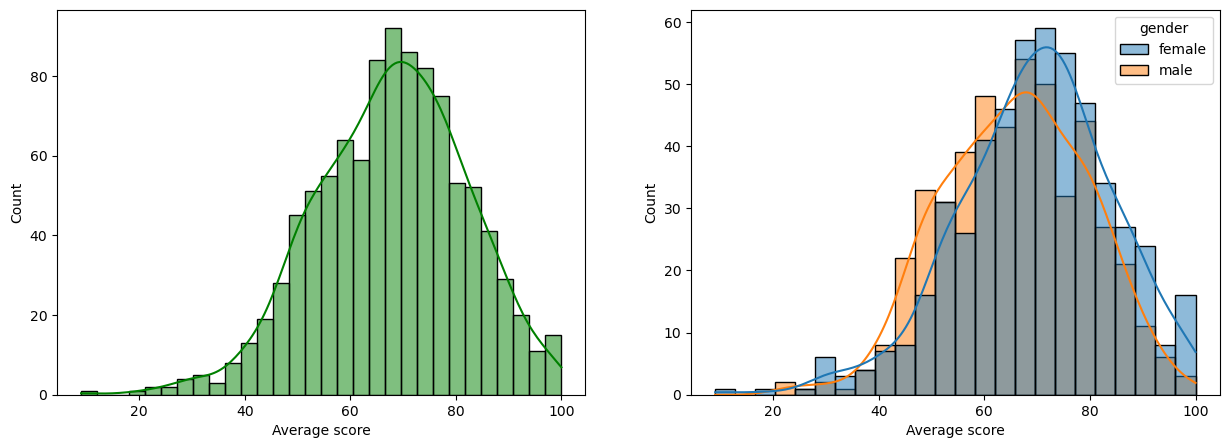

In [31]:
# Average score vs Gender

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

#### 1) females tend to perform better than males

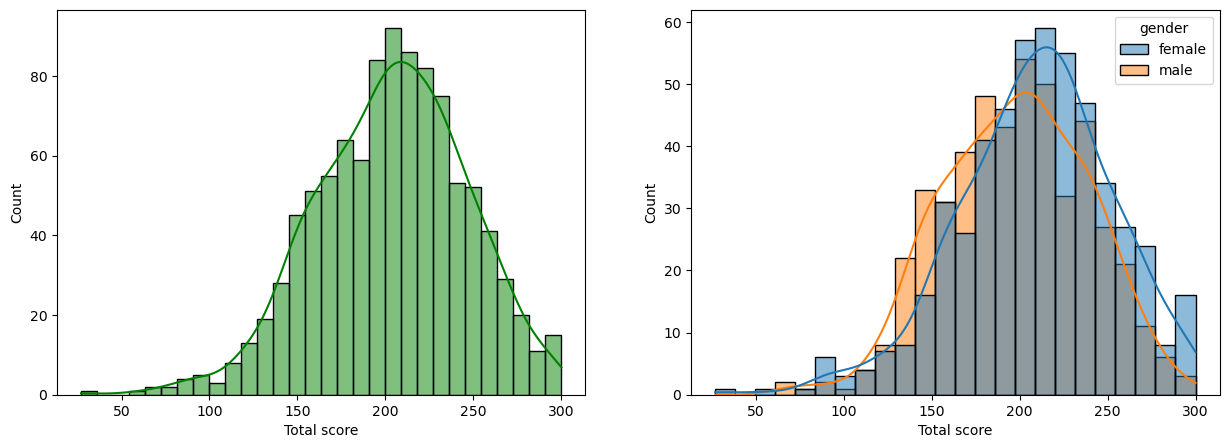

In [55]:
# Average Total score vs Gender

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()

#### 1) females tend to perform better than males


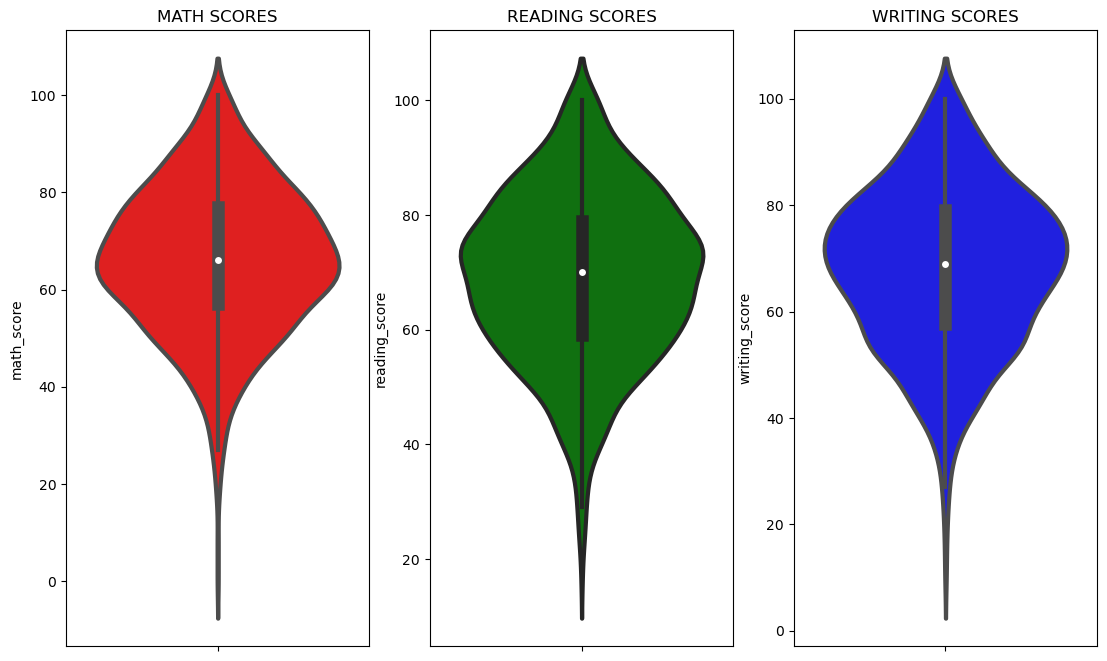

In [40]:
# Check math scores , writing scores , reading scores in the ranges they lie

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

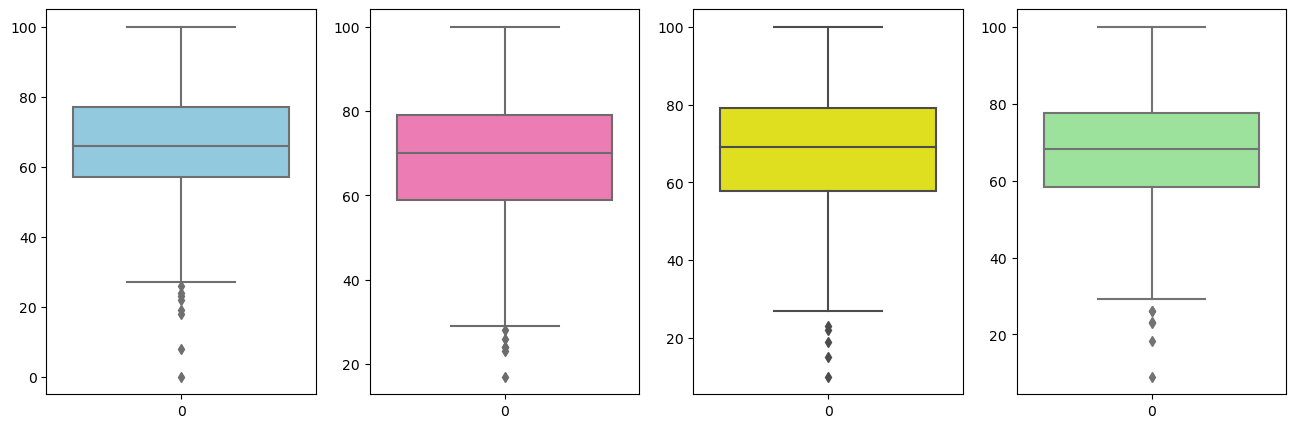

In [53]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average score'],color='lightgreen')
plt.show()

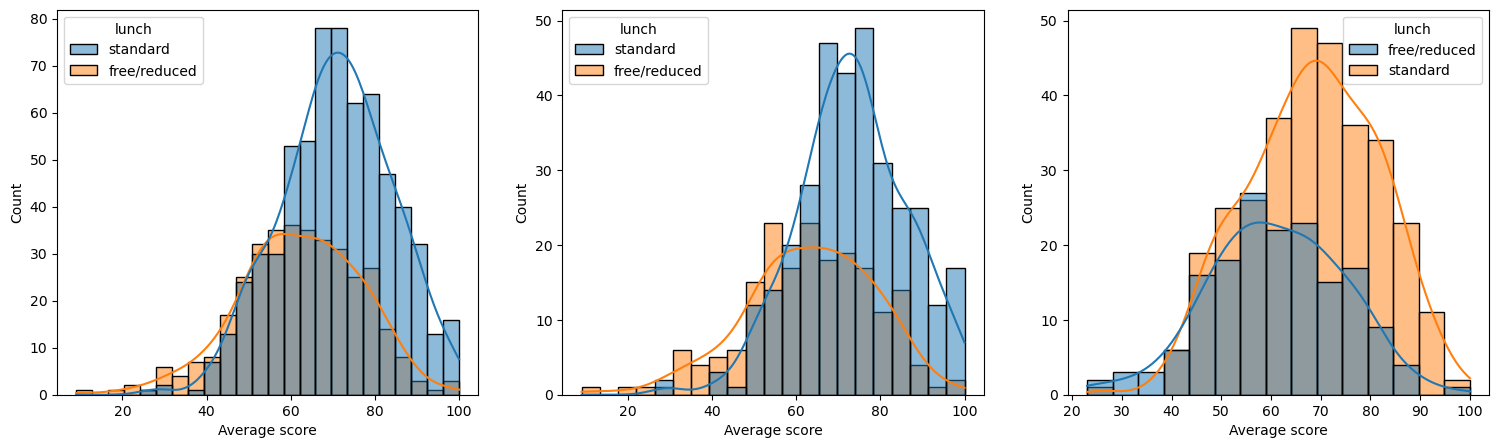

In [34]:
# Check average score vs gender w.r.t their perfomance with lunch

plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()

#### both genders tend to do better with standard lunch 

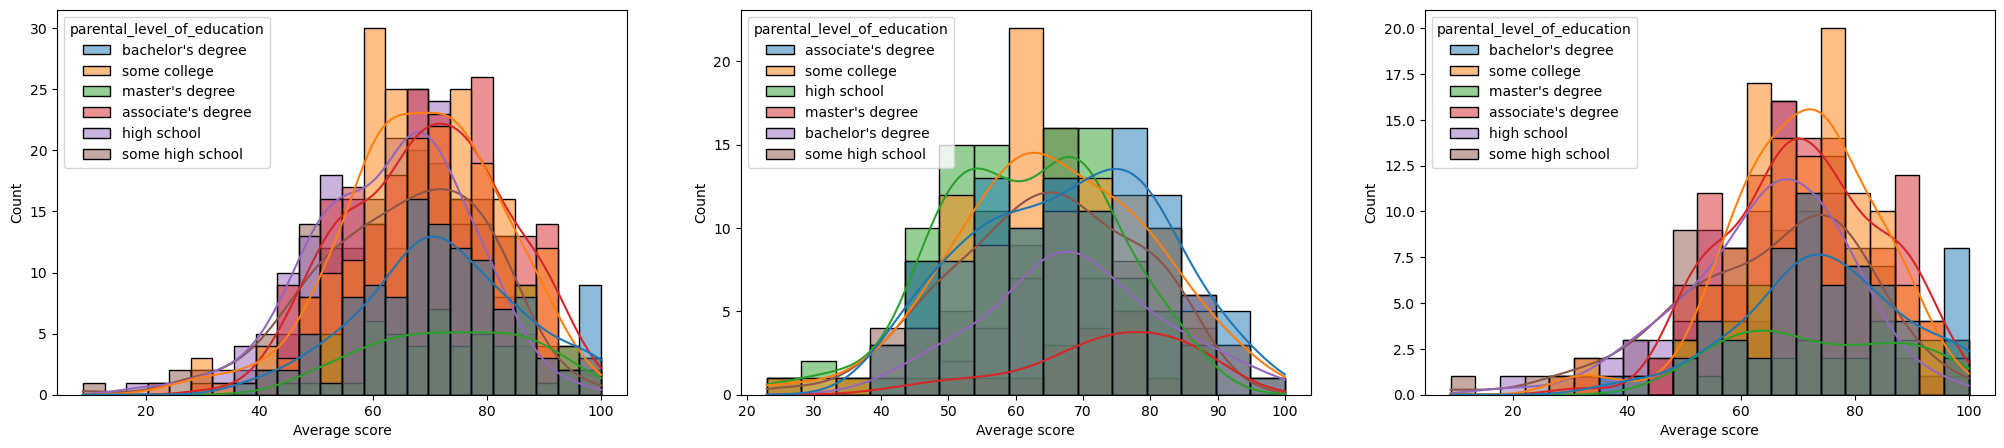

In [37]:
# Check average score vs gender w.r.t their perfomance with parental level of education

plt.subplots(1,3,figsize=(25,5))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='parental_level_of_education')
plt.show()

#### w.r.t Males , students perform better when their parents have either a master's degree or an associate's degree
#### w.r.t. Females , parental level of education doesn't make much of a difference

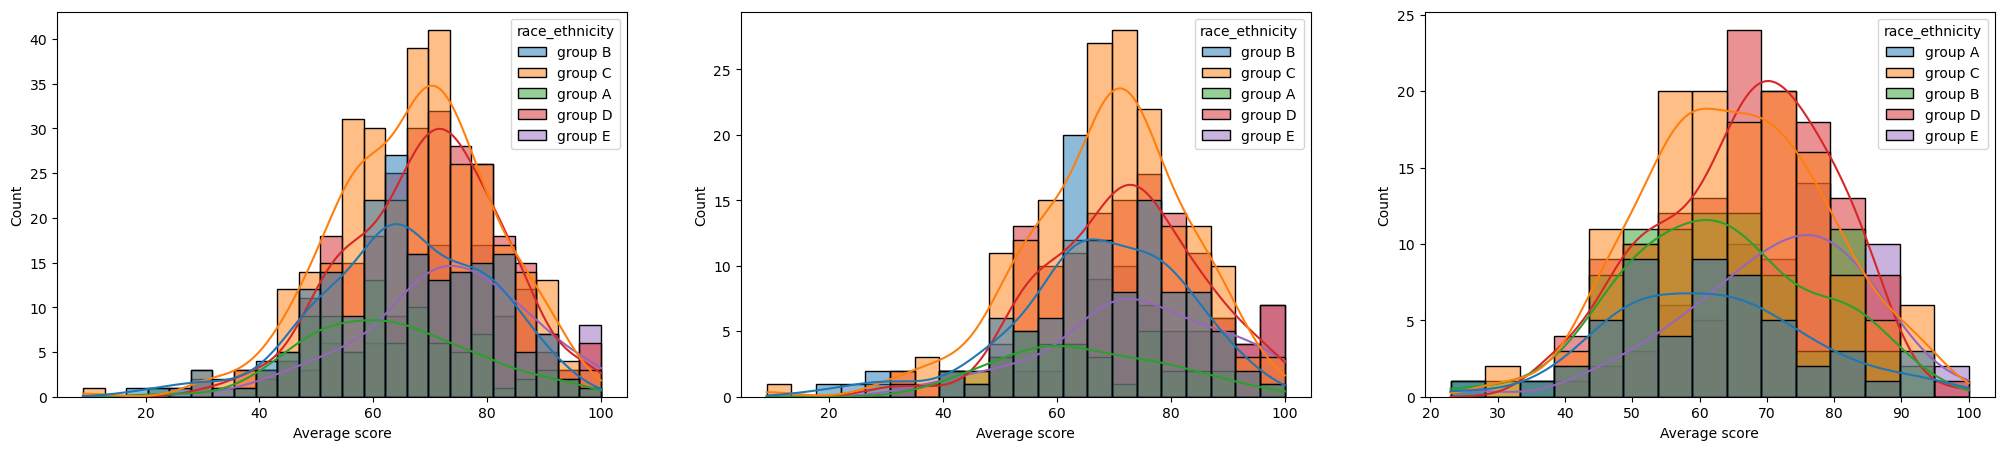

In [39]:
# Check average score vs gender w.r.t their perfomance with race ethnicity

plt.subplots(1,3,figsize=(25,5))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='race_ethnicity')
plt.show()

#### not much difference w.r.t Female
#### group E and group D perform well w.r.t Male

<Axes: >

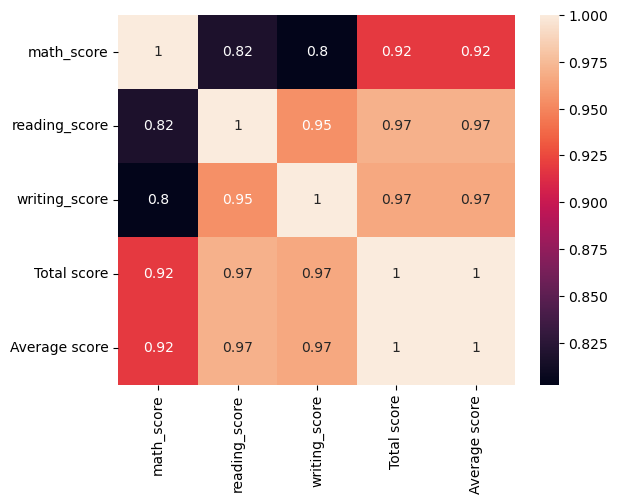

In [48]:
sns.heatmap(df.corr(),annot=True)

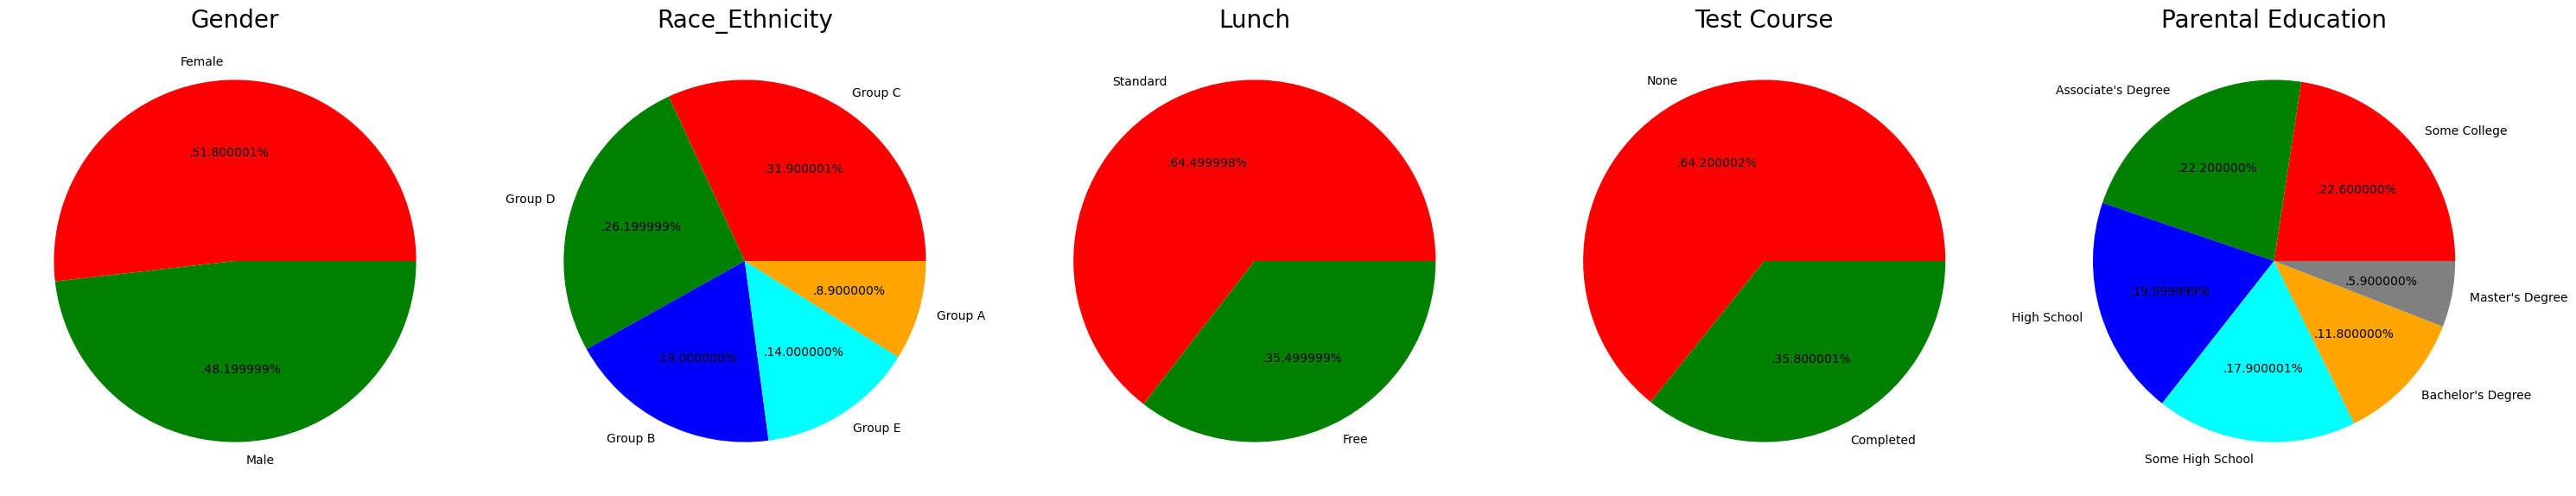

In [52]:
# check the proportions of values under each categorical columns

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### almost equal proportions of male and female students
#### higher percentage of group C students compared to the rest with group A having the lowest number
#### higher percentage of standard lunch vs free
#### majority of test course not completed
#### parents of the least number of students hold a master's degree

<Axes: xlabel='lunch', ylabel='writing_score'>

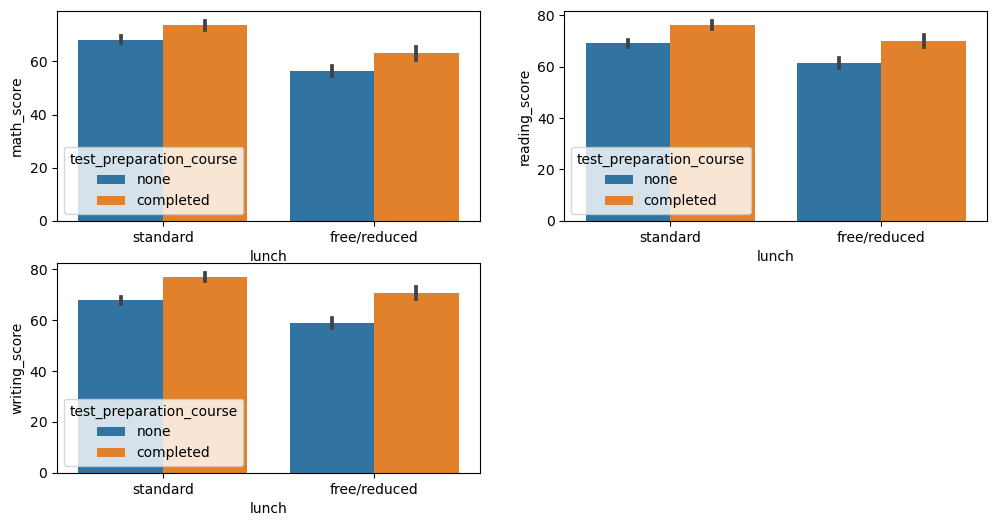

In [54]:
# math core vs lunch w.r.t test preparation course

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### students who have completed the test preparation course tend to do well